# Comparing Optimal Transport Methods for Nested Distance Computation

The goal of this notebook is to compare the performance of different optimal transport methods in computing the nested distance for an example of a stochastic tree. We evaluate the following methods:

1. **Algorithm 1:** Linear Programming on Tree Structure  
   *From:* **Nested Sinkhorn Divergence To Compute The Nested Distance**  
   *Alois Pichler & Michael Weinhardt*

2. **Algorithm 2:** POT Package to Solve the Inner OT Problem
   *From:* **Nested Sinkhorn Divergence To Compute The Nested Distance**  
   *Alois Pichler & Michael Weinhardt*

3. **Algorithm 3:** Sinkhorn Iteration on Trees  
   *From:* **Nested Sinkhorn Divergence To Compute The Nested Distance**  
   *Alois Pichler & Michael Weinhardt*

4. **Algorithm 4:** Linear Programming on Weighted Sample Paths  
   *From:* **Computational Methods for Adapted Optimal Transport**  
   *Stephan Eckstein and Gudmund Pammer*

In [1]:
import sys
import os
import time
import numpy as np

# Get the absolute path of src/ directory
notebooks_path = os.path.abspath(os.getcwd())  # Get the notebook’s current directory
src_path = os.path.abspath(os.path.join(notebooks_path, "../src"))

# Ensure src is in sys.path
if src_path not in sys.path:
    sys.path.insert(0, src_path)  # Insert at the beginning to prioritize it

In [2]:
# Import necessary modules from src
from trees.Tree_Node import *
from trees.TreeAnalysis import *
from trees.TreeVisualization import *
from trees.Save_Load_trees import *
from trees.Tree_AWD_utilities import *

from awd_trees.Nested_Dist_Algo import compute_nested_distance
from awd_trees.Gurobi_AOT import *

from AOT_numerics.mainfunctions import *
from AOT_numerics.measure import *
from AOT_numerics.normal_ot import *
from AOT_numerics.FVI_bench import *

In [3]:
# Load the trees
tree_1_root = load_tree(
    "/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/src/trees/Data_trees_exemple",
    "tree_1.pkl",
)

tree_2_root = load_tree(
    "/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/src/trees/Data_trees_exemple",
    "tree_2.pkl",
)

Tree successfully loaded from /Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/src/trees/Data_trees_exemple/tree_1.pkl
Tree successfully loaded from /Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/src/trees/Data_trees_exemple/tree_2.pkl


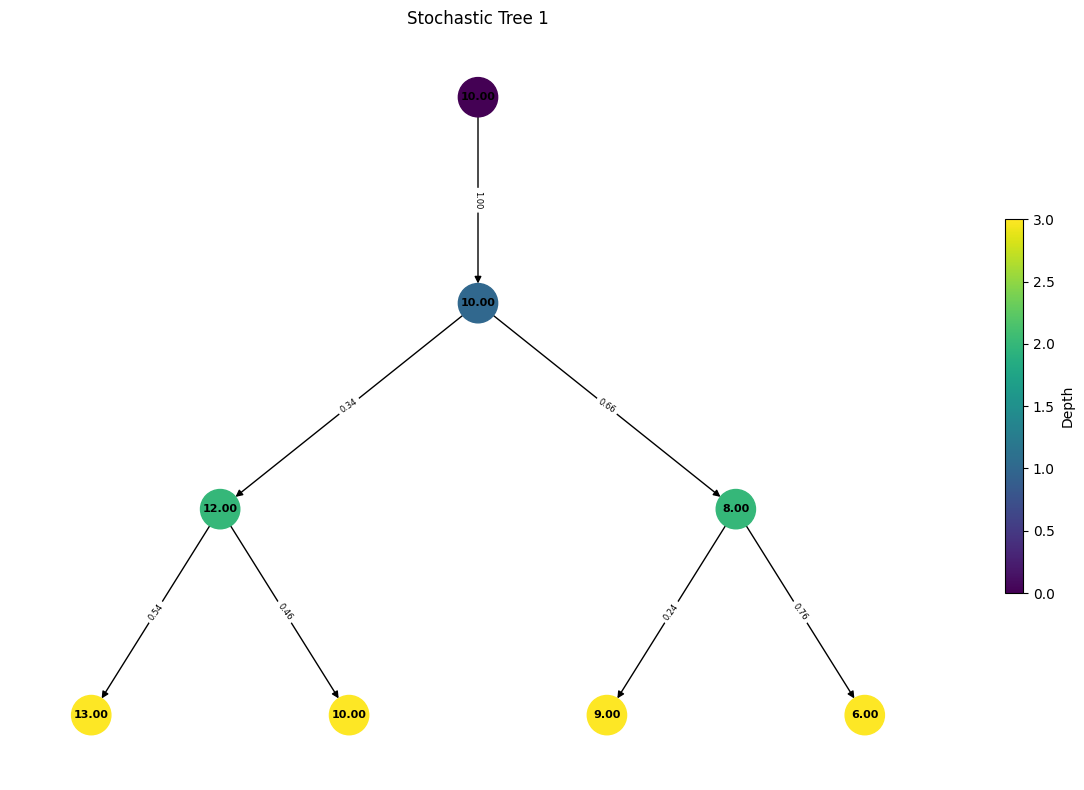

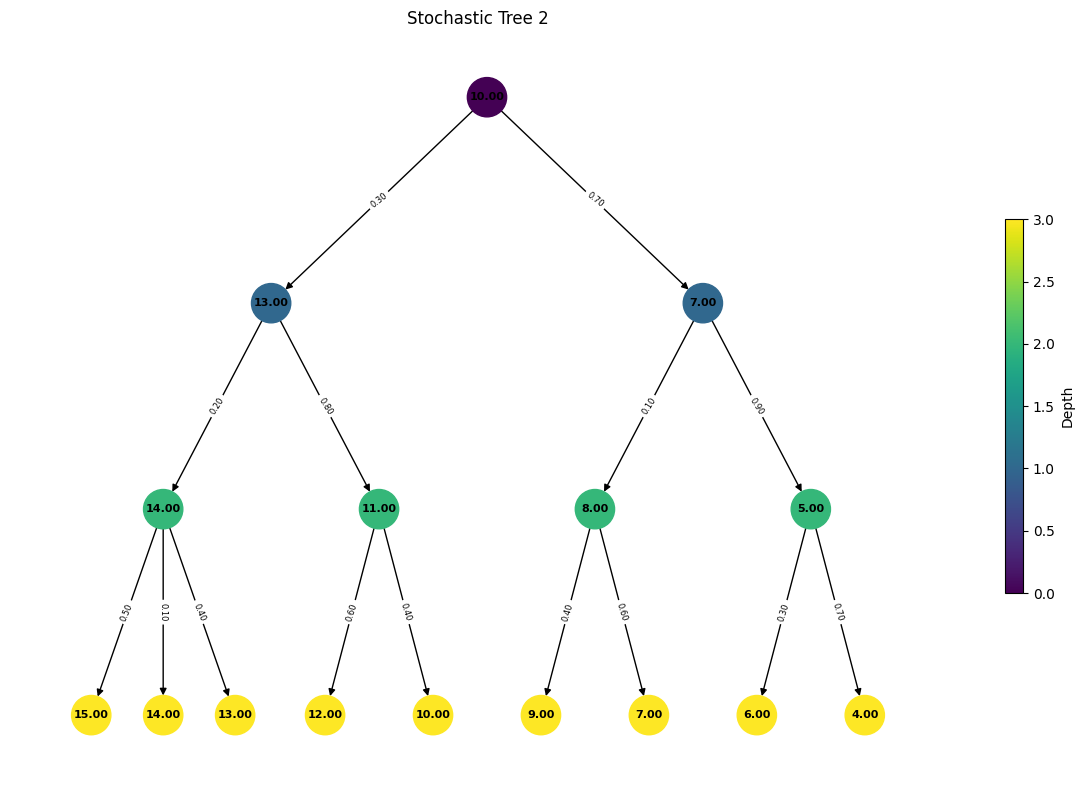

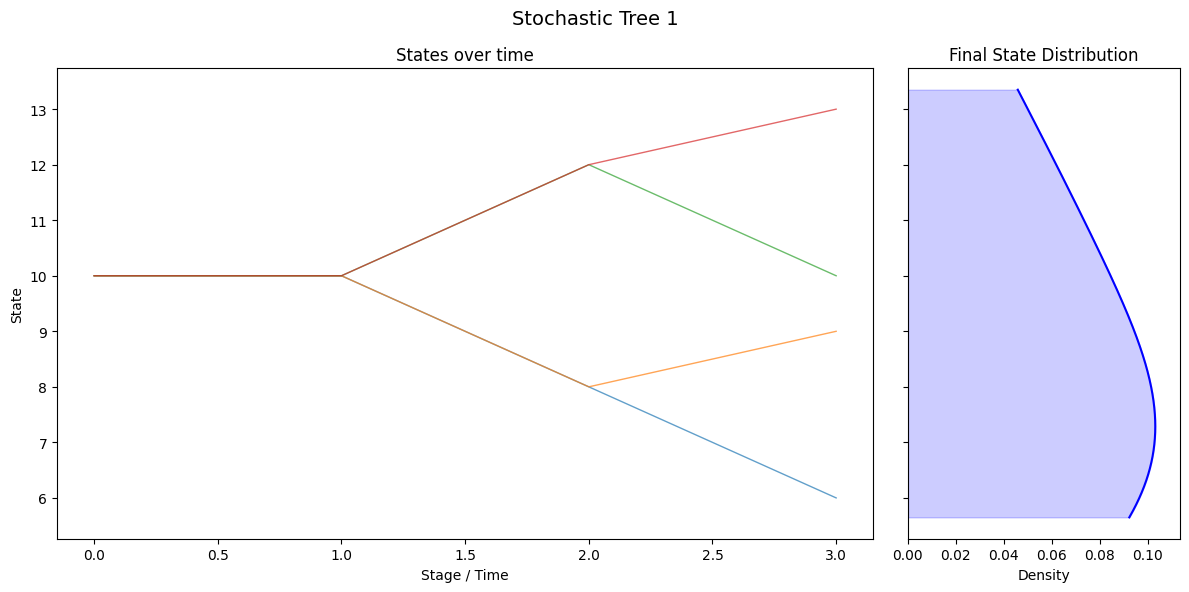

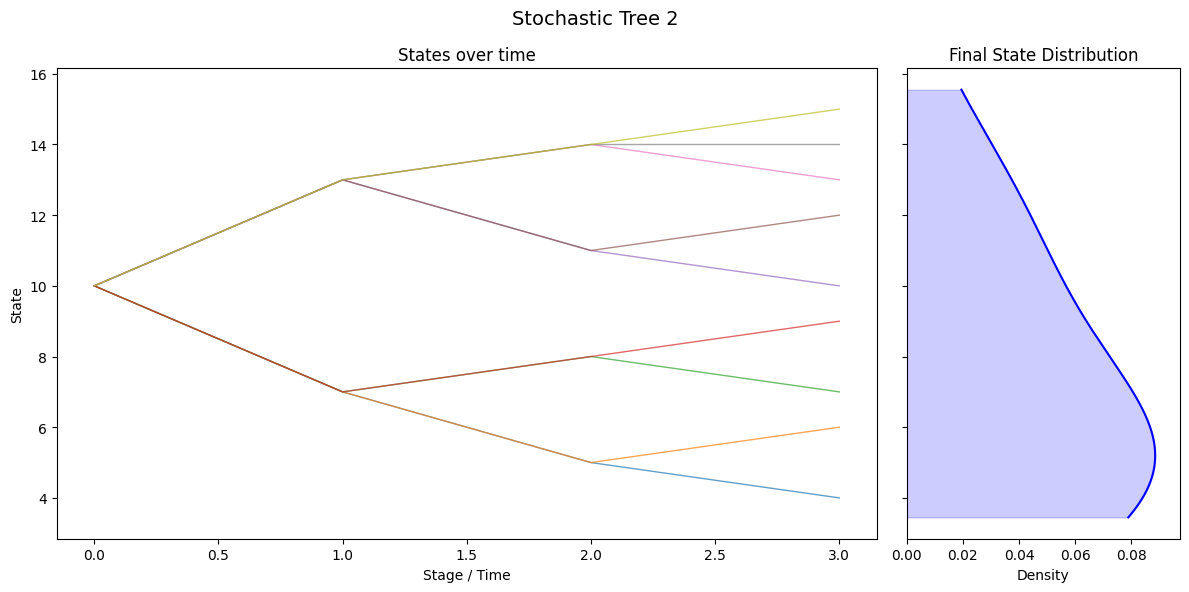


Tree 1 (Path and Weight Format):
Paths:
[[10 10 12 13]
 [10 10 12 10]
 [10 10  8  9]
 [10 10  8  6]]
Weights:
[0.1836 0.1564 0.1584 0.5016]

Tree 2 (Path and Weight Format):
Paths:
[[10 13 14 15]
 [10 13 14 14]
 [10 13 14 13]
 [10 13 11 12]
 [10 13 11 10]
 [10  7  8  9]
 [10  7  8  7]
 [10  7  5  6]
 [10  7  5  4]]
Weights:
[0.03  0.006 0.024 0.144 0.096 0.028 0.042 0.189 0.441]


In [4]:
# Determine the maximum depth of the trees
max_depth = get_depth(tree_1_root)

visualize_tree(tree_1_root, title="Stochastic Tree 1")
visualize_tree(tree_2_root, title="Stochastic Tree 2")

visualize_big_tree(tree_1_root, fig_size=(12, 6), title="Stochastic Tree 1")
visualize_big_tree(tree_2_root, fig_size=(12, 6), title="Stochastic Tree 2")


formatted_tree_1 = get_sample_paths(tree_1_root)
formatted_tree_2 = get_sample_paths(tree_2_root)

display_tree_data(formatted_tree_1, "Tree 1")
display_tree_data(formatted_tree_2, "Tree 2")

In [5]:
def print_results(distance, prob_matrix, elapsed_time):
    """Prints the nested distance, probability matrix, and computation time in a formatted way."""
    print(f"Nested Distance: {distance}\n")
    print(f"Final Probability Matrix:")
    for row in prob_matrix:
        print(" | ".join(f"{value:.5f}" for value in row))
    print(f"\nComputation Time: {elapsed_time:.4f} seconds\n")
    print("-" * 50 + "\n")

### Linear Program

In [6]:
start_time = time()

distance, final_prob_matrix = compute_nested_distance(
    tree_1_root,
    tree_2_root,
    max_depth,
    method="solver_lp",
    return_matrix=True,
    lambda_reg=0,
)

end_time = time()
elapsed_time = end_time - start_time

print_results(distance, final_prob_matrix, elapsed_time)

Nested Distance: 10.08776

Final Probability Matrix:
0.00240 | 0.00600 | 0.02400 | 0.02268 | 0.00000 | 0.00000 | 0.03780 | 0.00000 | 0.09072
0.02760 | 0.00000 | 0.00000 | 0.00252 | 0.01680 | 0.02800 | 0.00420 | 0.05040 | 0.02688
0.00000 | 0.00000 | 0.00000 | 0.00000 | 0.04752 | 0.00000 | 0.00000 | 0.00000 | 0.11088
0.00000 | 0.00000 | 0.00000 | 0.11880 | 0.03168 | 0.00000 | 0.00000 | 0.13860 | 0.21252

Computation Time: 0.0221 seconds

--------------------------------------------------



### POT Package

In [7]:
start_time = time()

distance, final_prob_matrix = compute_nested_distance(
    tree_1_root,
    tree_2_root,
    max_depth,
    method="solver_pot",
    return_matrix=True,
    lambda_reg=0,
)

end_time = time()
elapsed_time = end_time - start_time

print_results(distance, final_prob_matrix, elapsed_time)

Nested Distance: 10.087759999999998

Final Probability Matrix:
0.03000 | 0.00240 | 0.00000 | 0.02268 | 0.00000 | 0.00000 | 0.03780 | 0.00000 | 0.09072
0.00000 | 0.00360 | 0.02400 | 0.00252 | 0.01680 | 0.02800 | 0.00420 | 0.05040 | 0.02688
0.00000 | 0.00000 | 0.00000 | 0.00000 | 0.04752 | 0.00000 | 0.00000 | 0.00000 | 0.11088
0.00000 | 0.00000 | 0.00000 | 0.11880 | 0.03168 | 0.00000 | 0.00000 | 0.13860 | 0.21252

Computation Time: 0.0065 seconds

--------------------------------------------------



In [8]:
start_time = time()

distance, final_prob_matrix = compute_nested_distance(
    tree_1_root,
    tree_2_root,
    max_depth,
    method="solver_lp_pot",
    return_matrix=True,
    lambda_reg=0,
)

end_time = time()
elapsed_time = end_time - start_time

print_results(distance, final_prob_matrix, elapsed_time)

Nested Distance: 10.087759999999998

Final Probability Matrix:
0.03000 | 0.00240 | 0.00000 | 0.02268 | 0.00000 | 0.00000 | 0.03780 | 0.00000 | 0.09072
0.00000 | 0.00360 | 0.02400 | 0.00252 | 0.01680 | 0.02800 | 0.00420 | 0.05040 | 0.02688
0.00000 | 0.00000 | 0.00000 | 0.00000 | 0.04752 | 0.00000 | 0.00000 | 0.00000 | 0.11088
0.00000 | 0.00000 | 0.00000 | 0.11880 | 0.03168 | 0.00000 | 0.00000 | 0.13860 | 0.21252

Computation Time: 0.0059 seconds

--------------------------------------------------



### Sinkhorn Algorithm with Regularization

In [9]:
# Start timing the Sinkhorn with regularization computation
start_time = time()

# Compute nested distance using Sinkhorn iteration with regularization
distance_sinkhorn_reg, final_prob_matrix_sinkhorn_reg = compute_nested_distance(
    tree_1_root,
    tree_2_root,
    max_depth,
    method="Sinkhorn",
    return_matrix=True,
    lambda_reg=10,
)

# End timing
end_time = time()
elapsed_time_sinkhorn_reg = end_time - start_time

print_results(
    distance_sinkhorn_reg, final_prob_matrix_sinkhorn_reg, elapsed_time_sinkhorn_reg
)

Nested Distance: 10.087725888974695

Final Probability Matrix:
0.01620 | 0.00324 | 0.01296 | 0.02268 | 0.00000 | 0.01512 | 0.02268 | 0.02722 | 0.06350
0.01380 | 0.00276 | 0.01104 | 0.00252 | 0.01680 | 0.01288 | 0.01932 | 0.02318 | 0.05410
0.00000 | 0.00000 | 0.00000 | 0.02851 | 0.01901 | 0.00000 | 0.00000 | 0.03326 | 0.07762
0.00000 | 0.00000 | 0.00000 | 0.09029 | 0.06019 | 0.00000 | 0.00000 | 0.10534 | 0.24579

Computation Time: 0.0276 seconds

--------------------------------------------------



In [10]:
# Slow and not accurate but can be optimized I think

start_time = time()

distance, final_prob_matrix = compute_nested_distance(
    tree_1_root,
    tree_2_root,
    max_depth,
    method="solver_jax",
    return_matrix=True,
    lambda_reg=10,
)

end_time = time()
elapsed_time = end_time - start_time

print_results(distance, final_prob_matrix, elapsed_time)

Nested Distance: 10.205149859581988

Final Probability Matrix:
0.01123 | 0.00225 | 0.00898 | 0.03203 | 0.00059 | 0.00930 | 0.01395 | 0.03158 | 0.07369
0.00957 | 0.00191 | 0.00765 | 0.00422 | 0.02357 | 0.00792 | 0.01188 | 0.02690 | 0.06277
0.00221 | 0.00044 | 0.00177 | 0.02586 | 0.01724 | 0.00644 | 0.00003 | 0.03132 | 0.07309
0.00700 | 0.00140 | 0.00560 | 0.08189 | 0.05459 | 0.00434 | 0.01613 | 0.09919 | 0.23145

Computation Time: 12.7013 seconds

--------------------------------------------------



### Computing Nested Distance Using Gurobi (Linear Programming)

In [11]:
def cost_function(x, y):
    """Cost function: L1 distance."""
    return np.sum(np.abs(x - y))


start_time = time()

val_gurobi, pi_gurobi = gurobi_bm(
    [formatted_tree_1, formatted_tree_2],
    f=cost_function,
    r_opti=1,
    causal=1,
    anticausal=1,
    outputflag=0,
)

end_time = time()
elapsed_time_gurobi = end_time - start_time


print_results(val_gurobi, pi_gurobi, elapsed_time_gurobi)

Set parameter Username
Set parameter LicenseID to value 2604970
Academic license - for non-commercial use only - expires 2026-01-03
Nested Distance: 10.08776

Final Probability Matrix:
0.03000 | 0.00000 | 0.00240 | 0.02268 | 0.00000 | 0.02800 | 0.00980 | 0.05040 | 0.04032
0.00000 | 0.00600 | 0.02160 | 0.00252 | 0.01680 | 0.00000 | 0.03220 | 0.00000 | 0.07728
0.00000 | 0.00000 | 0.00000 | 0.04752 | 0.00000 | 0.00000 | 0.00000 | 0.11088 | 0.00000
0.00000 | 0.00000 | 0.00000 | 0.07128 | 0.07920 | 0.00000 | 0.00000 | 0.02772 | 0.32340

Computation Time: 0.0373 seconds

--------------------------------------------------



# On two other tree: AWD VS WD:

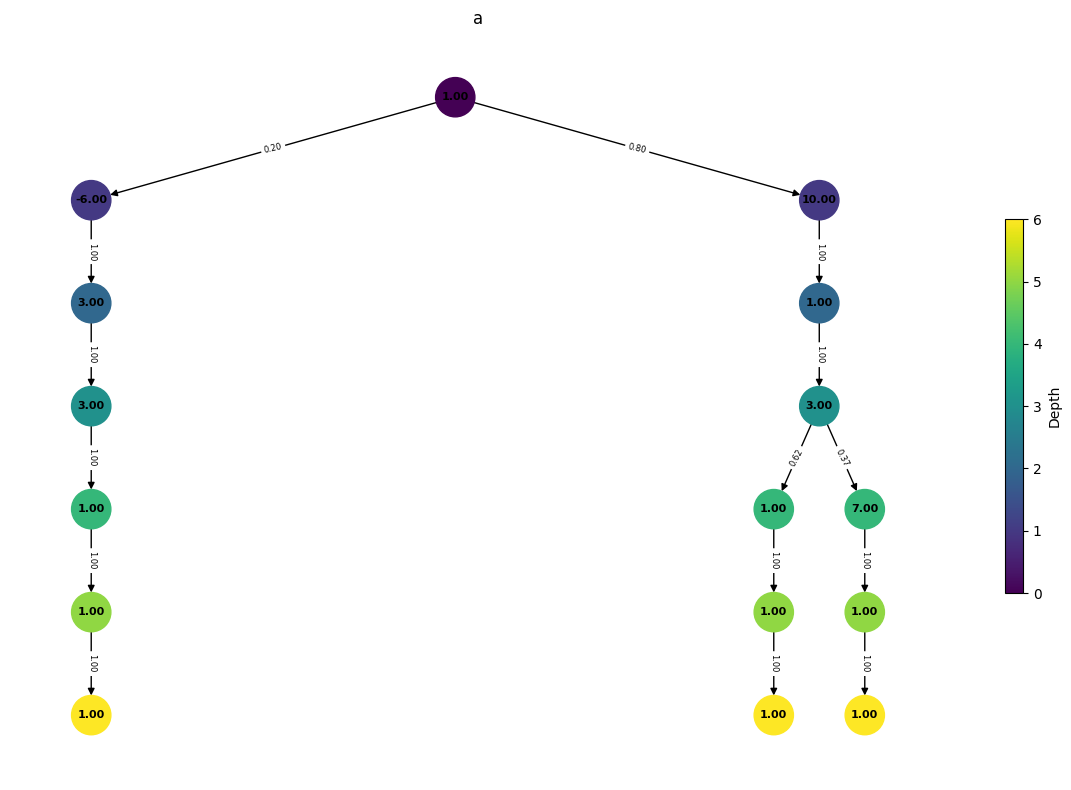

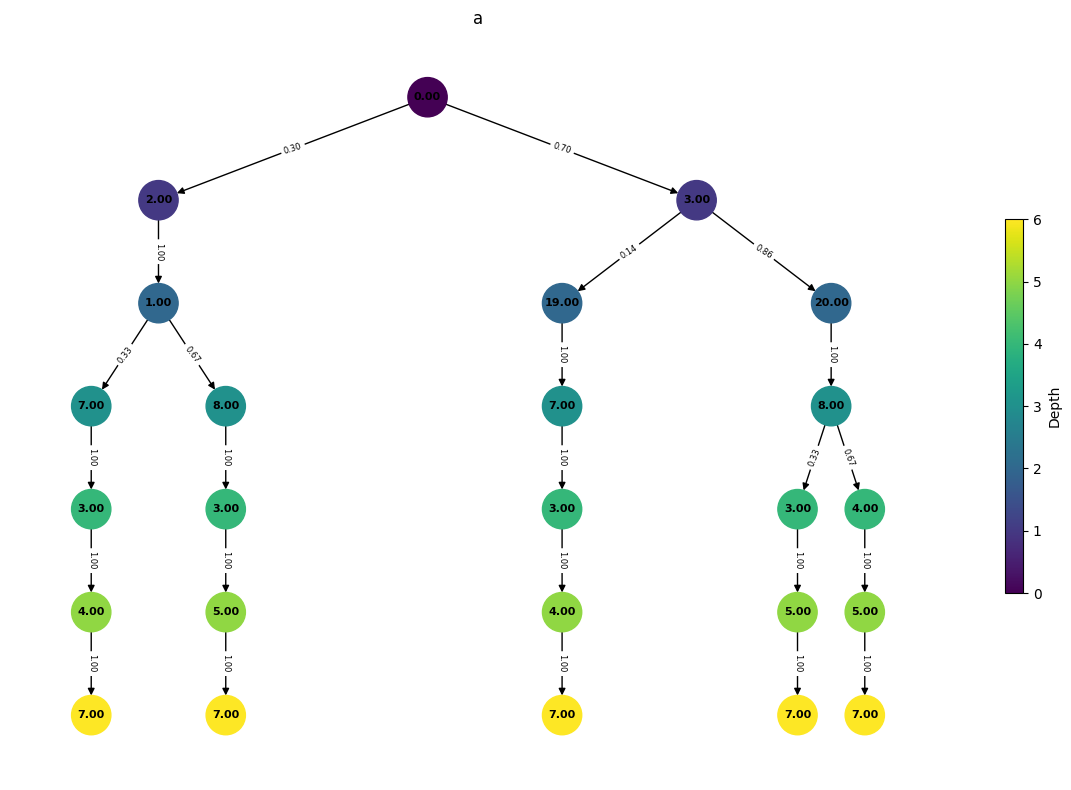

Nested Distance: 38.778571428571425

Final Probability Matrix:
0.00000 | 0.00000 | 0.01786 | 0.05714 | 0.05000
0.06250 | 0.06667 | 0.04464 | 0.14286 | 0.12500
0.03750 | 0.00000 | 0.02679 | 0.00000 | 0.16071

Computation Time: 0.0106 seconds

--------------------------------------------------

38.5


In [28]:
from trees.Build_trees_from_paths import *

tree1_paths = np.array([[1, 2 - 8, 3, 3, 1, 1, 1], [1, 2 + 8, 1, 3, 1, 1, 1], [1, 2 + 8, 1, 3, 7, 1, 1]])

tree1_weights = np.array([0.2, 0.5, 0.3])

tree2_paths = np.array(
    [
        [0, 2, 1, 7, 3, 4, 7],
        [0, 2, 1, 8, 3, 5, 7],
        [0, 3, 19, 7, 3, 4, 7],
        [0, 3, 20, 8, 3, 5, 7],
        [0, 3, 20, 8, 4, 5, 7],
    ]
)

tree2_weights = np.array([0.1, 0.2, 0.1, 0.2, 0.4])

tree1_root = build_tree_from_paths(tree1_paths, tree1_weights)

tree2_root = build_tree_from_paths(tree2_paths, tree2_weights)

visualize_tree(tree1_root, "a")
visualize_tree(tree2_root, "a")

start_time = time()

max_depth = get_depth(tree1_root)

distance, final_prob_matrix = compute_nested_distance(
    tree1_root,
    tree2_root,
    max_depth,
    method="solver_lp_pot",
    return_matrix=True,
    lambda_reg=0,
)

end_time = time()
elapsed_time = end_time - start_time

print_results(distance, final_prob_matrix, elapsed_time)


def cost_function(x, y):
    """Cost function: L1 distance."""
    return np.sum(np.abs(x - y))


formatted_tree_1 = get_sample_paths(tree1_root)
formatted_tree_2 = get_sample_paths(tree2_root)
start_time = time()

val_gurobi = gurobi_bm(
    [formatted_tree_1, formatted_tree_2],
    f=cost_function,
    r_opti=0,
    causal=0,
    anticausal=0,
    outputflag=0,
)

end_time = time()
elapsed_time_gurobi = end_time - start_time


print(val_gurobi)